# NVE - Molecular Dynamics

It is presented here the study of a Lennard-Jones system in the microcanonical ensemble, i.e. with volume, particle number and energy fixed.
Requiring energy to be fixed calls for an appropriate simulation techinque: as opposed to the NVT ensemble, we are going to employ a method that relies on the integration energy-conserving Hamilton's equations: the Verlet algorithm performs well in this regard, and the determinism embedded in it guarantees (that's what it aims to, at least) conservation of energy.

Different sets of parameters correspond to the three phases being simulated, solid, liquid and gasseous:\
\
$\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$) $\quad$ (solid)\
$\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$) $\quad$ (liquid)\
$\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$) $\quad$  (gas)\
\
The star indicates that we are using reduced units for our calculations.\
\
The meaning of the temperature indicated above is that this is the **target** temperature on which the system stabilizes itself after a certain number of MD steps: **equilibration** is studied and performed starting from a higher input temperature in order to make it attain that target value. This is very much needed since the initial configuration, in order to avoid superposition among particles, is an FCC lattice in all three cases.\
\
In the following sections we analyze, other than of course temperature, the total energy per particle $ E / N $ and the components it is made up of, kinetic and potential energy ($K / N$ and $ U / N $), and pressure $P$. This is evaluated by making use of the virial theorem, which provides an expression for pressure in terms of **microscopic** quantities:\
\
$$ 
P = \rho^* T + \frac{1}{3V^*} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48 \left[ \left(\frac{1}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{1}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle 
$$
\
where of course also the interparticle distances are to be understood in terms of reduces units

The simulations are performed restarting the system each time: data blocking and the computation of statistical uncertainties is therefore implemented in this notebook (the values read from the output file are the current averages, progressive averages are created from the available data).
Each block is constituted by 1000 MD steps

### Set up

In [1]:
from array import array
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
def error(av, av2, n): 
    if n == 0:
        return 0
    else:
        return math.sqrt((av2[n] - av[n]**2)/n)

In [3]:
def column(matrix, i):
    return [row[i] for row in matrix]

In [4]:
def read(observable, phase, runs, instant=0):
    col = 1 if instant == 1 else 2
    mat = []
    for i in range(runs):
        #leggere il file e metterlo nella matrice
        with open('NSL_SIMULATOR/OUTPUT/'+phase+'/'+observable+str(i)+'.dat') as f:
            data = f.readlines()
        for line in data:
            s = line.split()
            if s[0].isdigit():
                mat.append(s)
    measure = np.asarray(column(mat, col), dtype=np.float64)
    errors = np.asarray(column(mat, 3), dtype=np.float64)
    
    return measure, errors

In [5]:
def block_avgs(N, m, n):
    sum_prog = np.zeros(N-n)
    su2_prog = np.zeros(N-n)
    err_prog = np.zeros(N-n)
    m2 = m * m
    for i in range(N-n):
        for j in range(n, n+i+1):
            sum_prog[i] += m[j]
            su2_prog[i] += m2[j]
        sum_prog[i] /= (i+1)
        su2_prog[i] /= (i+1)
        err_prog[i] = error(sum_prog, su2_prog, i)
    
    return sum_prog, err_prog

In [6]:
observables = ['temperature', 'kinetic_energy', 'potential_energy', 'total_energy', 'pressure']

# SOLID

## Equilibration

We make one simulation consisting of **100 blocks** with **1000 steps** each to see what is the value of the temperature approached with one suitable value chosen as an input. The "instantaneous" value (the one measured in each block) for the temperature is shown to be approaching the desired temperature

In [7]:
NRuns = 1
NBlocks = 100
TotBlocks = NRuns * NBlocks
blocks = np.arange(TotBlocks) + 1

T = read('temperature', 'SOLID', NRuns, 1)

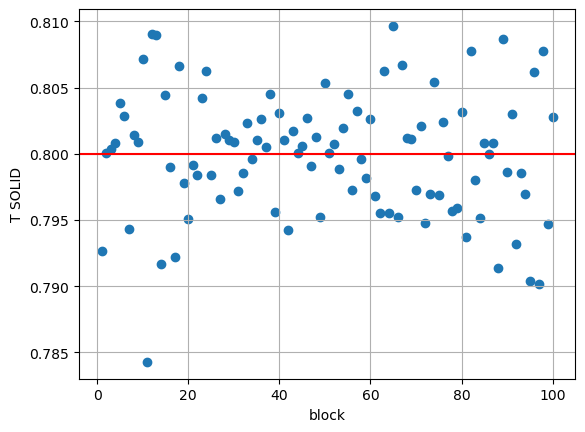

In [8]:
plt.scatter(blocks, T[0])
plt.axhline(y = .8, color = 'r', linestyle = '-') 
plt.xlabel('block')
plt.ylabel('T SOLID')
plt.grid(True)
plt.show()

Clear as it is from the graph, we take the starting temperature for the following simulations to be $T$ = **1.541** (reduced units) and we can consider the system equilibrated after the 15th block as that's where the most evident outliers are cut out

## Measurements

In [9]:
NRuns = 1
NBlocks = 100
TotBlocks = NRuns * NBlocks
start = 15

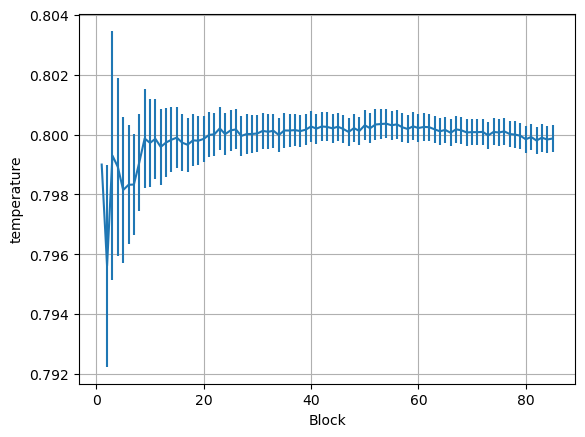

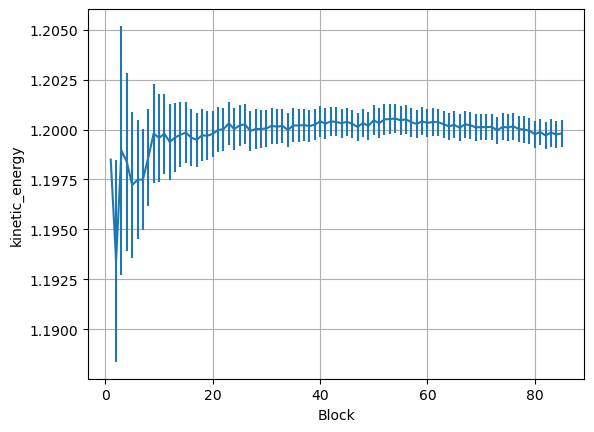

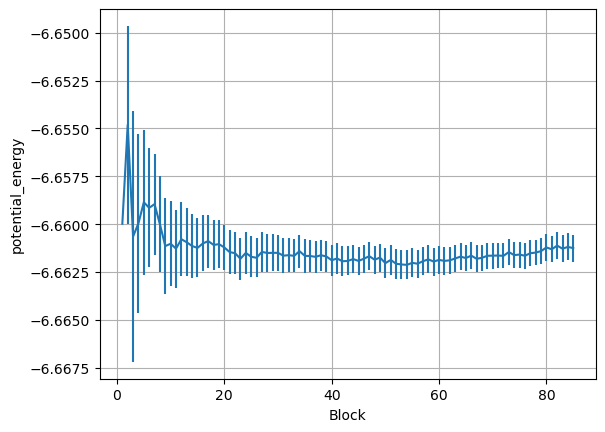

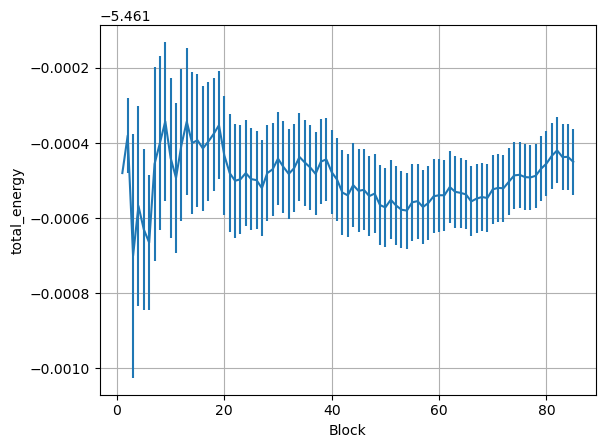

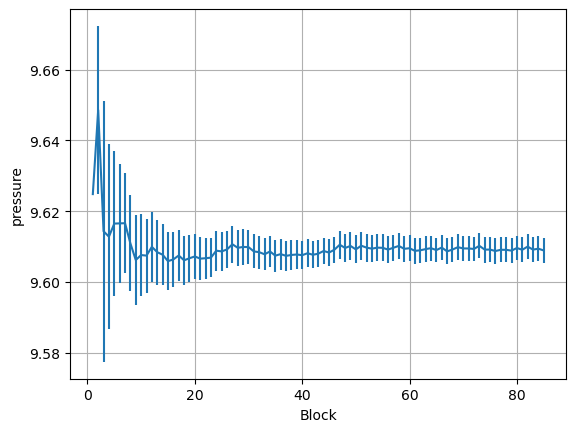

In [10]:
for i in range(len(observables)):
    x = read(observables[i], 'SOLID', NRuns, 1)
    x = block_avgs(TotBlocks, x[0], start)
    plt.errorbar(np.arange(len(x[0])) + 1, x[0], yerr = x[1])
    plt.xlabel('Block')
    plt.ylabel(observables[i])
    plt.grid(True)
    plt.show()

# LIQUID #

## Equilibration

As well as in the previous section, simulations are run with **100 blocks** of **1000 steps**. The exact same study follows

In [11]:
NRuns = 1
NBlocks = 100
TotBlocks = NRuns * NBlocks
blocks = np.arange(TotBlocks) + 1

T = read('temperature', 'LIQUID', NRuns, 1)

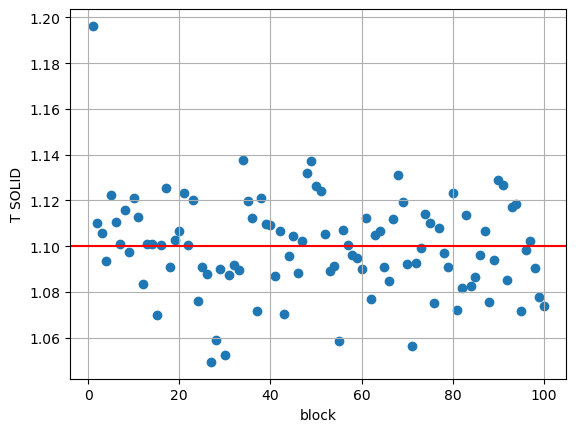

In [12]:
plt.scatter(blocks, T[0])
plt.axhline(y = 1.1, color = 'r', linestyle = '-') 
plt.xlabel('block')
plt.ylabel('T SOLID')
plt.grid(True)
plt.show()

The starting value of $T$ we are going to conduct the following simulations with, for the liquid phase, is **1.978** (reduced units). Wanting to be **_very_** strict, we could state that the system takes about 30 blocks to stabilize itself on the equlibrium temperature, we are going to discard the corresponding number of blocks in the following section

## Measurements

In [13]:
NRuns = 1
NBlocks = 100
TotBlocks = NRuns * NBlocks
start = 30

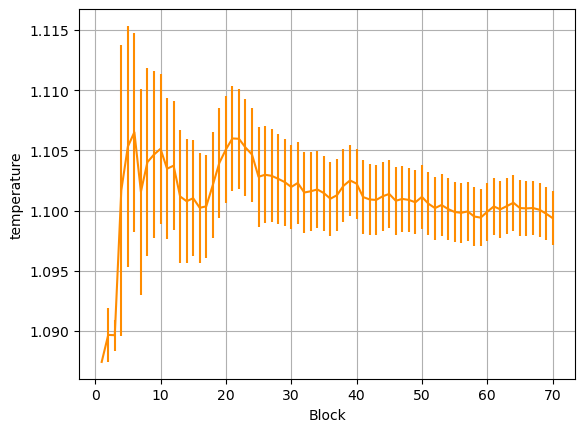

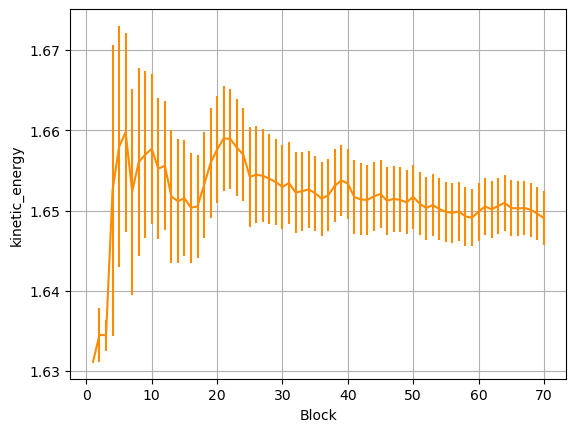

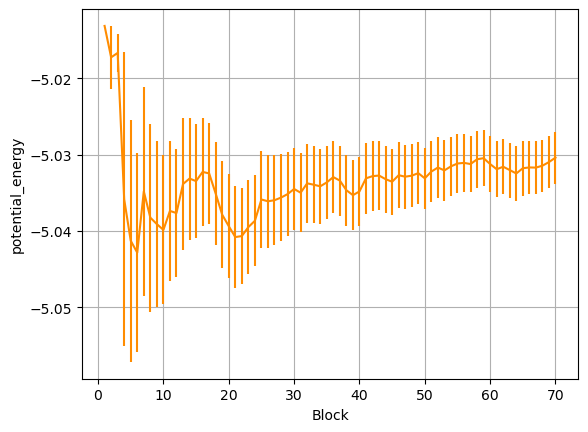

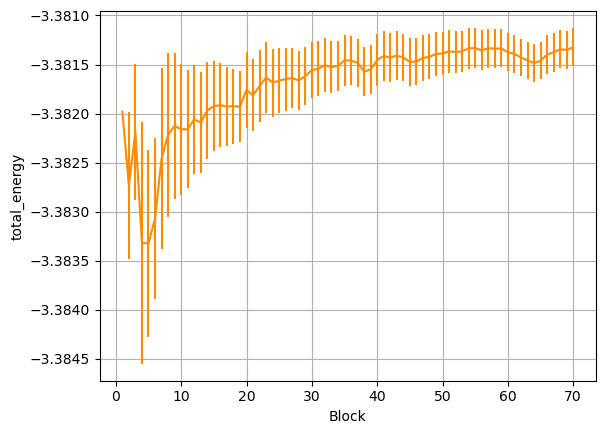

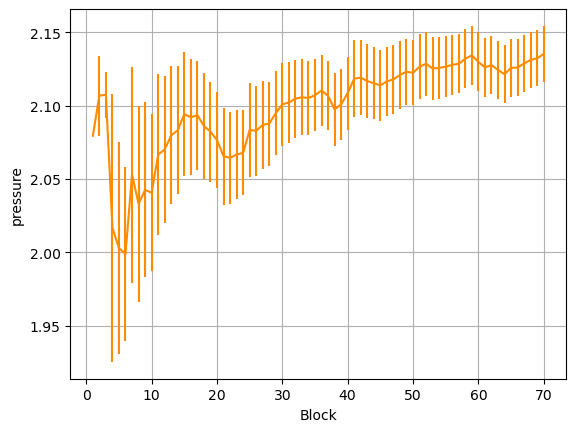

In [14]:
for i in range(len(observables)):
    x = read(observables[i], 'LIQUID', NRuns, 1)
    x = block_avgs(TotBlocks, x[0], start)
    plt.errorbar(np.arange(len(x[0])) + 1, x[0], yerr = x[1], color = 'darkorange')
    plt.xlabel('Block')
    plt.ylabel(observables[i])
    plt.grid(True)
    plt.show()

# GAS

## Equilibration

In [15]:
NRuns = 1
NBlocks = 100
TotBlocks = NRuns * NBlocks
blocks = np.arange(TotBlocks) + 1

T = read('temperature', 'GAS', NRuns, 1)

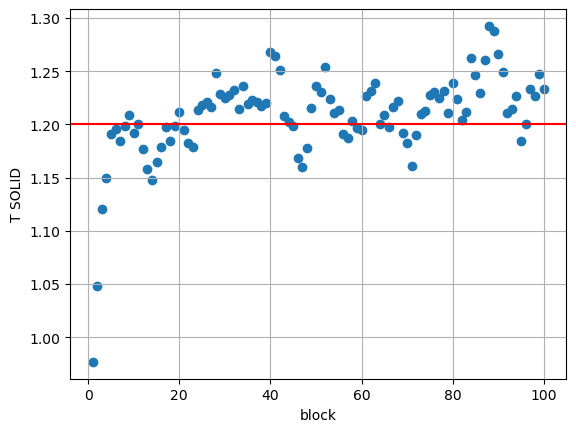

In [16]:
plt.scatter(blocks, T[0])
plt.axhline(y = 1.2, color = 'r', linestyle = '-') 
plt.xlabel('block')
plt.ylabel('T SOLID')
plt.grid(True)
plt.show()

The starting value of $T$ is **0.97** (as before, in reduced units). It appears that the most problematic phase ends after the first few blocks, however it is probably a good idea to cut out the first swerve, as it lowers significantly the overall value of the temperature: the first 25 blocks are discarded in what follows. Even though we would expect the gasseous phase to take longer to equilibrate than the solid and liquid phase, this longer time effect is probably lost due to the fact that we are considering blocks large enough to mask it

## Measurements

In [17]:
NRuns = 1
NBlocks = 100
TotBlocks = NRuns * NBlocks
start = 25

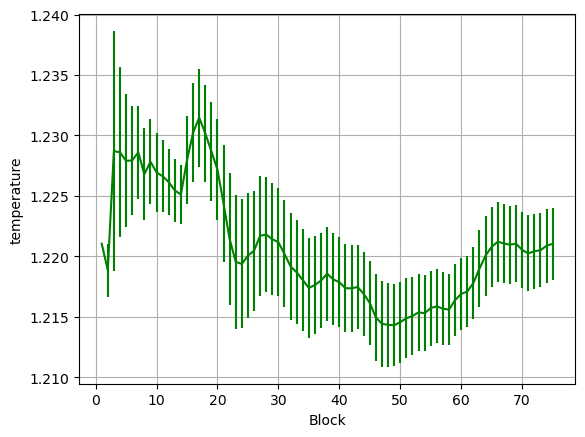

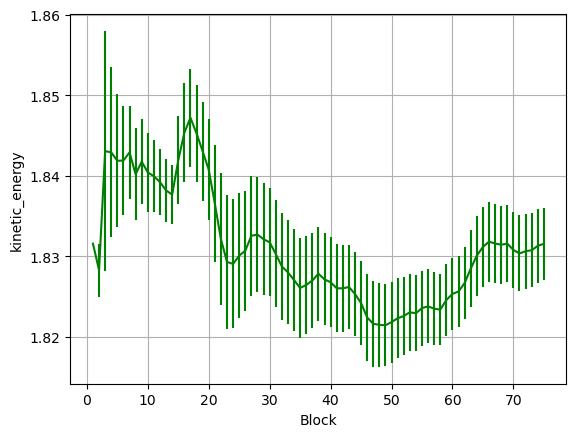

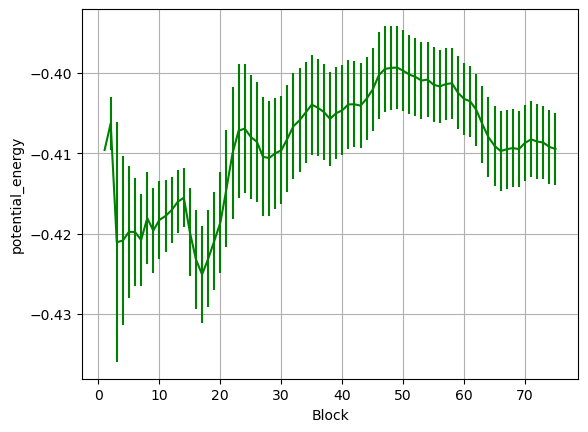

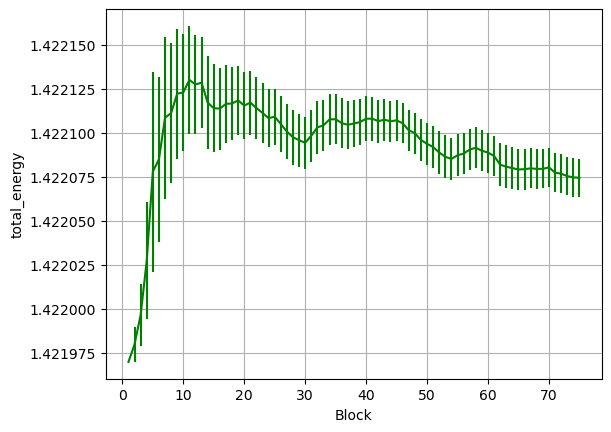

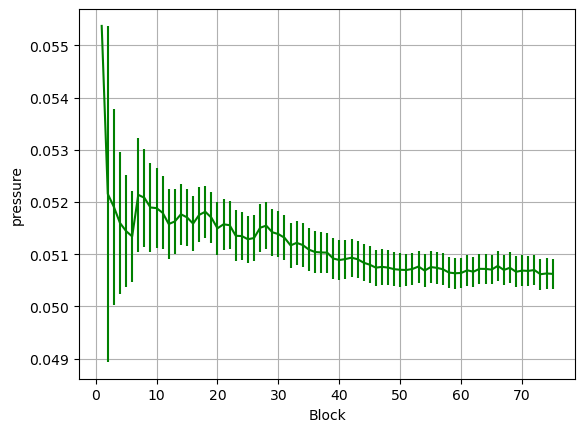

In [18]:
for i in range(len(observables)):
    x = read(observables[i], 'GAS', NRuns, 1)
    x = block_avgs(TotBlocks, x[0], start)
    plt.errorbar(np.arange(len(x[0])) + 1, x[0], yerr = x[1], color = 'green')
    plt.xlabel('Block')
    plt.ylabel(observables[i])
    plt.grid(True)
    plt.show()